# Plotting
Author: Javier Duarte

In [16]:
import ROOT as rt

treename = 'HZZ4LeptonsAnalysisReduced'
VARS = ['f_massjj','f_deltajj']

tfile = {}
tree = {}
hist = {}
tfile['gg'] = rt.TFile.Open('data/ntuple_4mu_gg.root')
tfile['VV'] = rt.TFile.Open('data/ntuple_4mu_VV.root')
tree['gg'] = tfile['gg'].Get(treename)
tree['VV'] = tfile['VV'].Get(treename)

hist['gg_f_massjj'] = rt.TH1D('gg_f_massjj','gg_f_massjj',100, 0, 2000)
hist['VV_f_massjj'] = rt.TH1D('VV_f_massjj','VV_f_massjj',100, 0, 2000)

tree['gg'].Project('gg_f_massjj','f_massjj', 'f_massjj > 0 && f_deltajj > 0')
tree['VV'].Project('VV_f_massjj','f_massjj', 'f_massjj > 0 && f_deltajj > 0')

hist['gg_f_deltajj'] = rt.TH1D('gg_f_deltajj','gg_f_deltajj',100, 0, 10)
hist['VV_f_deltajj'] = rt.TH1D('VV_f_deltajj','VV_f_deltajj',100, 0, 10)

tree['gg'].Project('gg_f_deltajj','f_deltajj', 'f_massjj > 0 && f_deltajj > 0')
tree['VV'].Project('VV_f_deltajj','f_deltajj', 'f_massjj > 0 && f_deltajj > 0')

hist['gg_f_massjj'].SetLineColor(rt.kRed)
hist['gg_f_deltajj'].SetLineColor(rt.kRed)

%jsroot
c1 = rt.TCanvas('c1','c1',500,400)
hist['VV_f_massjj'].Draw()
hist['gg_f_massjj'].Draw('same')
c1.Draw()

c2 = rt.TCanvas('c2','c2',500,400)
hist['VV_f_deltajj'].Draw()
hist['gg_f_deltajj'].Draw('same')
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


In [5]:
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
VARS = [ 'f_massjj', 'f_deltajj']
filename = {}
h5file = {}
params = {}
df = {}

filename['VV'] = 'data/ntuple_4mu_VV.h5'
filename['gg'] = 'data/ntuple_4mu_gg.h5'

h5file['VV'] = h5py.File(filename['VV'], 'r') # open read-only
params['VV'] = h5file['VV'][treename][()]
h5file['gg'] = h5py.File(filename['gg'], 'r') # open read-only
params['gg'] = h5file['gg'][treename][()]

df['VV'] = pd.DataFrame(params['VV'],columns=VARS)
df['gg'] = pd.DataFrame(params['gg'],columns=VARS)

df['VV']= df['VV'][(df['VV'].f_massjj > 0) & (df['VV'].f_deltajj > 0)] # cut out undefined variables
df['gg']= df['gg'][(df['gg'].f_massjj > 0) & (df['gg'].f_deltajj > 0)] # cut out undefined variables

df['VV']['isSignal'] = np.ones(len(df['VV'])) # add isSignal variable
df['gg']['isSignal'] = np.zeros(len(df['gg'])) # add isSignal variable

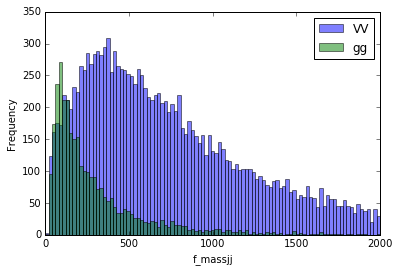

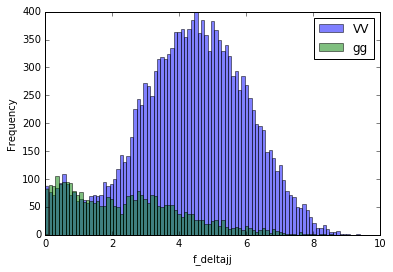

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.xlabel(VARS[0])
bins = np.linspace(0, 2000, 100)
df['VV'][VARS[0]].plot.hist(bins, alpha=0.5, label='VV')
df['gg'][VARS[0]].plot.hist(bins, alpha=0.5, label='gg')
plt.legend(loc='upper right')
plt.figure()
plt.xlabel(VARS[1])
bins = np.linspace(0, 10, 100)
df['VV'][VARS[1]].plot.hist(bins, alpha=0.5, label='VV')
df['gg'][VARS[1]].plot.hist(bins, alpha=0.5, label='gg')
plt.legend(loc='upper right')